<a href="https://colab.research.google.com/github/selinealdridge/BINA23_Stadler_Rail_Semesterarbeit/blob/main/Python%20BINA%20FS23%20Notebook_Datenbereinigung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

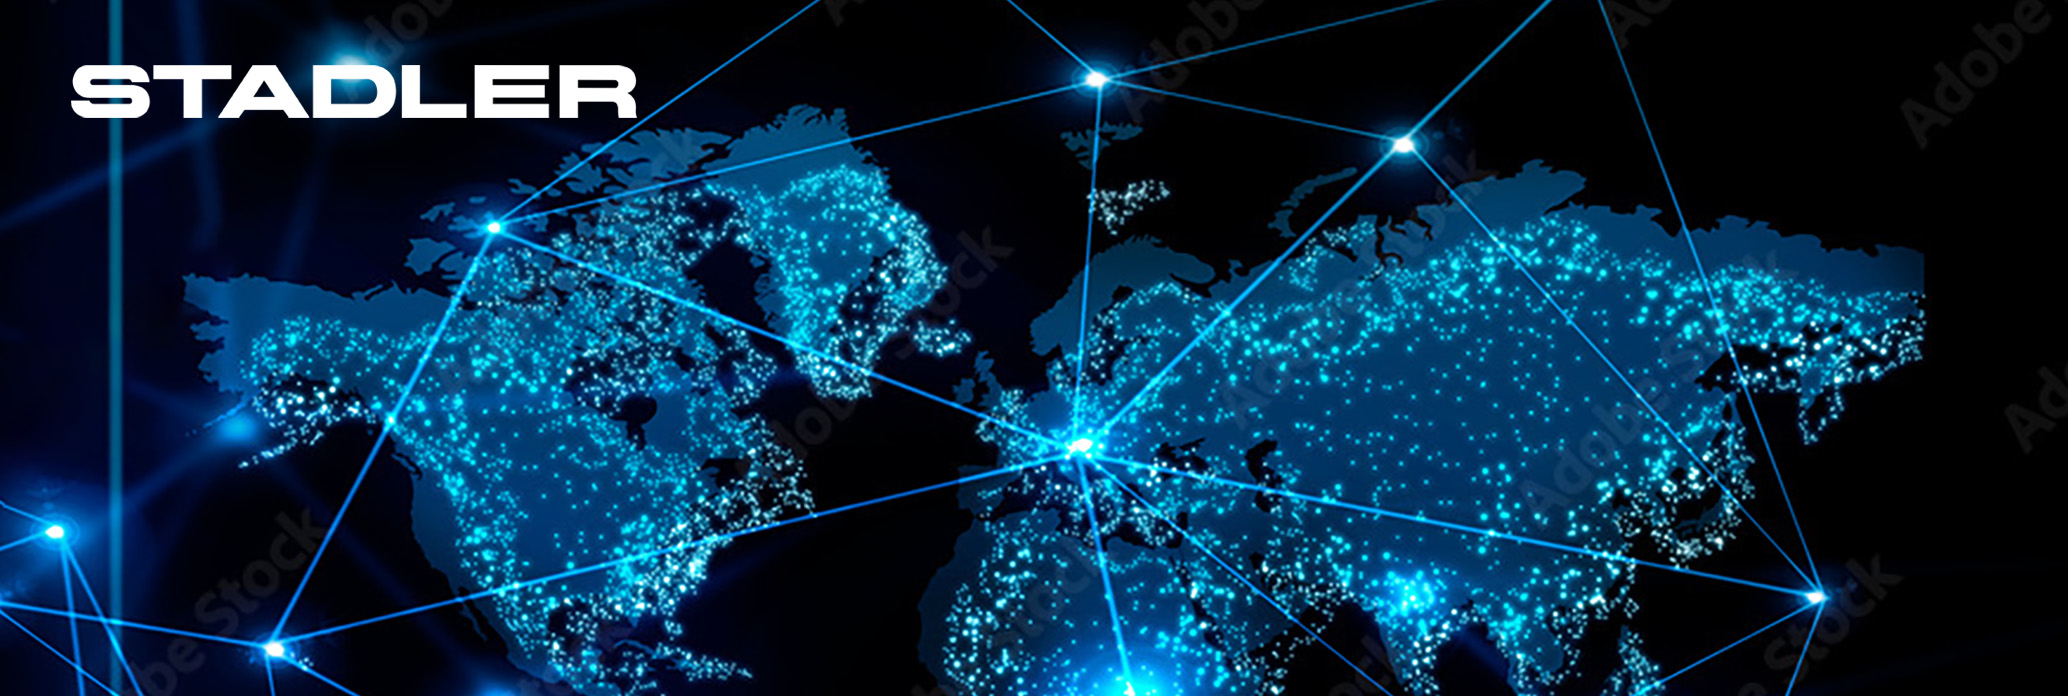


VERTRAULICH

Die Weitergabe oder Publikation dieser Arbeit ohne schriftliche Zustimmung der Stadler Rail AG ist untersagt.

<br>



**MSc Wirtschaftsinformatik**

**BINA - Business Intelligence & Analytics (FS23)**

<br>


# Transportnetz-Struktur Stadler Rail AG – From Data To Decisions: "Transportwirtschaft"
##Auswertung der in Auftrag gegebenen Analyse der europaweiten Strassentransporte von Halb- und Fertigfabrikaten einer Produktionsfirma

<br>

Modulabschlussarbeit, eingereicht am 16.06.2023 von:

*   Aldridge, Seline, Leiterin digitale Kommunikation, Oberer Aareggweg 23, 3004 Bern, 078 850 78 49, aldrs1@bfh.ch
*   Mascherpa, Cynthia, Werkstudentin indirekter Einkauf, Zielgasse 11, 9033 Untereggen, 076 431 79 27, cyn-thia.mascherpa@ost.ch
*   Lam, Ho Yin, Junior SAP BI Consultant, Pianostrasse 63, 2503 Biel, 077 435 13 15, hoyin.lam@stud.hslu.ch

<br>


###Erklärung
Wir erklären hiermit, dass wir die vorliegende Arbeit resp. die von uns ausgewiesene Leistung selbständig, ohne Mithilfe Dritter und nur unter Ausnützung der angegebenen Quellen verfasst resp. Erbracht habe.

Ort, Datum:		Zürich, 16. Juni 2023

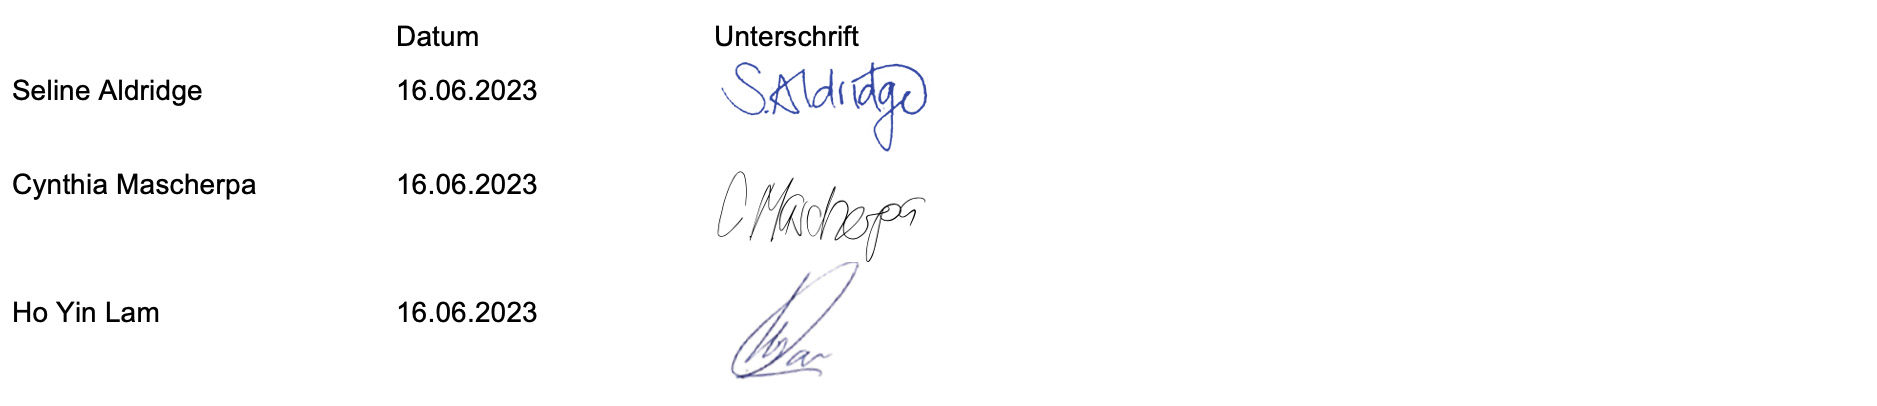

<br>

Dies ist ein auf [Colab Python IDE](https://colab.research.google.com/) basierendes [jupyter notebook](http://jupyter.org/) (früher als ipython notebook bezeichnet).

Daten:
+ BINA_FS23.csv von Alpega Transportmanagementsystem (TMS) extrahiert vom Server (CSV-Datei vor der Datenbereinigung)
+ BINA_FS23_bereinigt.csv (CSV-Datei nach der Datenbereinigung)

*Hinweis: Sie müssen diesen Datensatz in Ihren Colab-Arbeitsbereich hochladen, bevor Sie mit der Programmausführung beginnen!*

#Datenbereinigung

### Umgebung einrichten/prüfen und notwendige Bibliotheken importieren

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/BINA_CSV')
import pandas as pd
df = pd.read_csv('BINA_FS23.csv',sep=";")

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Laden von Daten aus dem Github-Repository in eine Dataframe-Variable
# import pandas as pd
# df = pd.read_csv('https://raw.githubusercontent.com/selinealdridge/BINA23_Stadler_Rail_Semesterarbeit/main/BINA_FS23.csv?token=GHSAT0AAAAAACC6K73FSAVTVRP2MW7XOI56ZDVYZOQ', sep=';').copy()
# df.head()
# print(df.head)

In [ ]:
import numpy as np
import pandas as pd

### Basisinformationen zu den Daten

Die Daten der Stadler Rail AG befanden sich mit Zeilen und Spalten in einem Excel. Damit die Autorinnen mit einem sauberen Datensatz arbeiten können, der auf die Bedürfnisse der vorliegenden Arbeit zugeschnitten sind, mussten die Spaltenbezeichnungen bereinigt werden, irrelevante Spalten/Zeilen bereinigt werden, relevante Informationen und Formatierungen hinzugefügt werden. Nachfolgend ist die Datenbereinigung aufgeführt.

In [ ]:
anzahl_zeilen = len(df)
anzahl_spalten = len(df.columns)
spalten_namen = df.columns.tolist()

print("Anzahl der Zeilen:", anzahl_zeilen)
print("Anzahl der Spalten:", anzahl_spalten)
print("Namen der Spalten:", spalten_namen)

Anzahl der Zeilen: 88019
Anzahl der Spalten: 14
Namen der Spalten: ['Transport\nMode', 'Origin Country', 'Origin Postal Code', 'Dest Country', 'Dest Postal Code', 'Status Consignment Collected \n(LS160) DateTime Last by Event', 'Startzeit', 'Entladungsdatum', 'Endzeit', 'Unit', 'Currency', 'Weight/Volume', 'Freight Cost\nAll in', 'Unnamed: 13']


In [ ]:
df.head()

,Transport\nMode,Origin Country,Origin Postal Code,Dest Country,Dest Postal Code,Status Consignment Collected \n(LS160) DateTime Last by Event,Startzeit,Entladungsdatum,Endzeit,Unit,Currency,Weight/Volume,Freight Cost\nAll in,Unnamed: 13
0,ROAD,CH,8330,CH,8570,17.01.2020,16:24:00,21.01.2020,12:14:00,Loading Meters,EUR,0.200,24.545196,NaN
1,ROAD,CH,6012,CH,8570,14.01.2020,16:44:00,14.03.2020,07:48:00,Loading Meters,EUR,0.800,119.503710,NaN
2,ROAD,CH,9565,US,18064,NaN,NaN,NaN,NaN,Loading Meters,EUR,6.907,0.000000,NaN
3,ROAD,CH,9565,CH,6593,NaN,NaN,08.01.2020,14:30:00,Loading Meters,EUR,2.800,0.000000,NaN
4,ROAD,CH,8330,CH,9565,24.01.2020,15:44:00,28.01.2020,08:24:00,Loading Meters,EUR,NaN,26.637344,NaN


###Umbennenung der Spaltenbezeichnung für bessere Verständlichkeit

In [ ]:
df.rename(columns={'Status Consignment Collected \n(LS160) DateTime Last by Event': 'Beladungsdatum',
                   'Transport\nMode': 'Transport_Modus',
                   'Origin Postal Code': 'Start_PLZ',
                   'Origin Country': 'Start_Land_ISO',
                   'Dest Country': 'Endstation_Land_ISO',
                   'Dest Postal Code': 'Endstation_PLZ',
                   'Ref': 'Referenz',
                   'Weight/Volume': 'Lademeter'}, inplace=True)



###Identifizierung und Behandlung von fehlenden Werten

* Die Spalte "Unnamed: 13" besitzt keine Angaben und wird gelöscht.

In [ ]:
df = df.drop(['Unnamed: 13'], axis=1)


* Die Referenz auf die Währung und die Masseinheit ist nicht erforderlich.
* Im Hinblick auf die Frachtkosten ist die Angabe "Freight Cost All in" gemäss den Informationen der Organisation nicht relevant.
* Die Angaben in der Spalte "Transport_Modus" sind redundant, da es sich bei jedem Transport um einen Strassentransport handelt.

In [ ]:
df = df.drop(['Currency','Unit','Freight Cost\nAll in','Transport_Modus'], axis=1)


* In einem nächsten Schritt werden Zeilen ohne Angaben geprüft und gelöscht

In [ ]:
nan_count = df['Lademeter'].isna().sum()
total_rows = df.shape[0]
nan_ratio = nan_count / total_rows
print (nan_ratio)

0.03228848316840682


3 % aller Zeilen, habe keine Angaben zu den Lademetern. Sie werden gelöscht.

In [ ]:
df.dropna(subset=['Lademeter'], inplace=True)


In [ ]:
nan_count1 = df['Start_Land_ISO'].isna().sum()
total_rows1 = df.shape[0]
nan_ratio1 = nan_count1 / total_rows1
print (nan_ratio1)

0.0


0 % aller Zeilen, habe keine Angaben zu dem Abfahrtsort. Keine Zeile muss gelöscht werden.

In [ ]:
nan_count1 = df['Endstation_Land_ISO'].isna().sum()
total_rows1 = df.shape[0]
nan_ratio1 = nan_count1 / total_rows1
print (nan_ratio1)

0.0


0 % aller Zeilen, habe keine Angaben zu der Endstation. Keine Zeile muss gelöscht werden.

In [ ]:
nan_count1 = df['Beladungsdatum'].isna().sum()
total_rows1 = df.shape[0]
nan_ratio1 = nan_count1 / total_rows1
print (nan_ratio1)

0.3210491095013912


32 % aller Zeilen, habe keine Angaben zum Beladungsdatum. Die Zeilen werden gelöscht.

In [ ]:
df.dropna(subset=['Beladungsdatum'], inplace=True)

In [ ]:
nan_count1 = df['Entladungsdatum'].isna().sum()
total_rows1 = df.shape[0]
nan_ratio1 = nan_count1 / total_rows1
print (nan_ratio1)

0.028652452836713874


Die restlichen 3% der Zeilen, ohne Entladungsdatum werden gelöscht.

In [ ]:
df.dropna(subset=['Entladungsdatum'], inplace=True)

###Anpassung von Datentypen und Formatierung

* Korrekte Formatierung der Zeitangabe in den Spalten "Beladungsdatum" und "Entladungsdatum"

Indem wir den Timestamp in diesem Format angeben, stellen wir sicher, dass er einheitlich und leicht lesbar ist. Es erleichtert auch die Sortierung und den Vergleich von Zeitstempeln.

In [ ]:
#Umwandlung der Spalten "Beladungsdatum" und "Entladungsdatum" in Datetime-Objekte mit korrekter Formatierung
df["Beladungsdatum"] = pd.to_datetime(df["Beladungsdatum"], format='%d.%m.%Y')
df["Entladungsdatum"] = pd.to_datetime(df["Entladungsdatum"], format='%d.%m.%Y')

#Konvertierung der Spalten "Startzeit" und "Endzeit" in datetime-Objekte und Kombination mit den Daten

df["Start"] = pd.to_datetime(df["Beladungsdatum"].dt.date.astype(str) + " " + df["Startzeit"])
df["End"] = pd.to_datetime(df["Entladungsdatum"].dt.date.astype(str) + " " + df["Endzeit"])

#Berechnung der Dauer in Stunden und Tagen

df['Dauer'] = df['End'] - df['Start']
df['Tage'] = df['Dauer'].dt.days
df['Stunden'] = df['Dauer'].dt.seconds // 3600

#Tage und Stunden in einer Spalte zusammenfassen

df['Dauer (Tage,Stunden)'] = df['Tage'].astype(str) + ' Tage' + ',' + df['Stunden'].astype(str) + ' Stunden'



###Datenintegration und -erweiterung

* Hinzufügen der Abkürzungen für Produktionswerken

Das Hinzufügen der Werkabkürzungen ist notwendig, da die interne Kommunikation auf diesen Abkürzungen basiert. Dadurch können wir effizienter und präziser Informationen austauschen. Die Verwendung von Abkürzungen erleichtert die Verständigung zwischen verschiedenen Abteilungen und Teams in verschiedenen Werken. Es fördert eine reibungslose Kommunikation und stellt sicher, dass alle Beteiligten auf dem gleichen Stand sind.

In [ ]:
df.loc[(df['Start_Land_ISO'] == 'CH') & (df['Start_PLZ'].isin(['9565', '8570', '9323', '8583', '8560'])), 'Produktionswerk Start'] = 'STAG'
df.loc[(df['Endstation_Land_ISO'] == 'CH') & (df['Endstation_PLZ'].isin(['9565', '8570', '9323', '8583', '8560'])), 'Produktionswerk Ende'] = 'STAG'

df.loc[(df['Start_Land_ISO'] == 'CH') & (df['Start_PLZ'].isin(['9430', '9423'])), 'Produktionswerk Start'] = 'STAR'
df.loc[(df['Endstation_Land_ISO'] == 'CH') & (df['Endstation_PLZ'].isin(['9430', '9423'])), 'Produktionswerk Ende'] = 'STAR'

df.loc[(df['Start_Land_ISO'] == 'CH') & (df['Start_PLZ'].isin(['8404'])), 'Produktionswerk Start'] = 'STAWI'
df.loc[(df['Endstation_Land_ISO'] == 'CH') & (df['Endstation_PLZ'].isin(['8404'])), 'Produktionswerk Ende'] = 'STAWI'

df.loc[(df['Start_Land_ISO'] == 'CH') & (df['Start_PLZ'].isin(['2504'])), 'Produktionswerk Start'] = 'SSG'
df.loc[(df['Endstation_Land_ISO'] == 'CH') & (df['Endstation_PLZ'].isin(['2504'])), 'Produktionswerk Ende'] = 'SSG'

df.loc[(df['Start_Land_ISO'] == 'DE') & (df['Start_PLZ'].isin(['13158', '13509', '10247' ])), 'Produktionswerk Start'] = 'STAP'
df.loc[(df['Endstation_Land_ISO'] == 'DE') & (df['Endstation_PLZ'].isin(['13158', '13509', '10247'])), 'Produktionswerk Ende'] = 'STAP'

df.loc[(df['Start_Land_ISO'] == 'PL') & (df['Start_PLZ'].isin(['08-110', '08110', '08-11' ])), 'Produktionswerk Start'] = 'STAPS'
df.loc[(df['Endstation_Land_ISO'] == 'PL') & (df['Endstation_PLZ'].isin(['08-110', '08110', '08-11'])), 'Produktionswerk Ende'] = 'STAPS'

df.loc[(df['Start_Land_ISO'] == 'PL') & (df['Start_PLZ'].isin(['63-000 ', '63000'])), 'Produktionswerk Start'] = 'STASA'
df.loc[(df['Endstation_Land_ISO'] == 'PL') & (df['Endstation_PLZ'].isin(['63-000 ', '63000'])), 'Produktionswerk Ende'] = 'STASA'

df.loc[(df['Start_Land_ISO'] == 'HU') & (df['Start_PLZ'].isin(['5000'])), 'Produktionswerk Start'] = 'STASK'
df.loc[(df['Endstation_Land_ISO'] == 'HU') & (df['Endstation_PLZ'].isin(['5000'])), 'Produktionswerk Ende'] = 'STASK'

df.loc[(df['Start_Land_ISO'] == 'ES') & (df['Start_PLZ'].isin(['46550'])), 'Produktionswerk Start'] = 'STAV'
df.loc[(df['Endstation_Land_ISO'] == 'ES') & (df['Endstation_PLZ'].isin(['46550'])), 'Produktionswerk Ende'] = 'STAV'

# Verschiebung der Spalte 'Produktionsstandort Start' an die zweite Position und 'Produktionsstandort Endstation' an die sechste Position
df.insert(2, 'Produktionswerk Start', df.pop('Produktionswerk Start'))
df.insert(5, 'Produktionswerk Ende', df.pop('Produktionswerk Ende'))

* Hinzufügen der Ländernamen gemäss ISO-Normen

Quellen für das Hinzufügen von Ländernamen auf Basis des ISO Code:

* See Python pycountry library for ISO country, subdivision, language, currency and script definitions and their translations

In [ ]:
!pip install pycountry
import pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 82.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=8ad3b783a7216b52e28b53eba52d6b9900905ad465dfda0fe4fde1dadbd43aa6
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [ ]:
def get_country_name(iso_code):
  try:
    iso_country = pycountry.countries.get(alpha_2=str(iso_code))
    country_name = iso_country.name
  except:
    country_name = None
  return country_name


In [ ]:
# Prüfen Sie die Funktion *get_country_name*
print(get_country_name('DE'))

Germany


In [ ]:
# eine neue Spalte auf der Grundlage von Werten aus anderen Spalten in einem Datenrahmen mit der Methode *apply* erstellen
df['Start_Land_Name'] = df.apply(lambda row: get_country_name(row['Start_Land_ISO']),axis=1)

df['Endstation_Land_Name'] = df.apply(lambda row: get_country_name(row['Endstation_Land_ISO']),axis=1)

# Spalte 'Start_Land_Name' an die zweite Position und 'Endstation_Land_Name' an die sechste Position verschieben
df.insert(2, 'Start_Land_Name', df.pop('Start_Land_Name'))
df.insert(5, 'Endstation_Land_Name', df.pop('Endstation_Land_Name'))

* Kategorisierung der Transporte in FTL, LTL, Stückgut

Hinweis: In dem Datensatz werden die Lademeter pro Sendung ersichtlich. Der Begriff Lademeter (LDM) ist eine Masseinheit in der Transport- und Logistikbranche, um die Ladefläche für zu transportierende Güter anzugeben. Folgende Kategorisierung muss für eine erhöhte Übersichtlichkeit der Transporte vorgenommen werden: Full Truck Load (FTL) (o.a. Komplettladung), Less Than Truck Load (LTL), Stückgut (engl. Groupage). Wie kommt man zu dieser Kategorisierung?

Stückgut: bis 2 Lademeter
LTL: von 2 bis 11.6 Lademeter
FTL: ab 11.6 Lademeter

Die Kategorisierung ist einerseits für die Preisberechnung wichtig, aber auch für die Anzahl Transporttage, die der LKW unterwegs ist, sowie für die Datenverarbeitung/Visualisierung.

In [ ]:
# Transport-Kategorie Spalte hinzufügen

df['Transport-Kategorie'] = df['Lademeter'].apply(lambda x: 'Stückgut' if x <= 2 else 'LTL' if x <= 11.6 else 'FTL')


* Die Datei besteht nach der Datenbereinigung aus folgenden Eigenschaften

In [ ]:
df.head()

,Start_Land_ISO,Start_PLZ,Start_Land_Name,Produktionswerk Start,Endstation_Land_ISO,Endstation_Land_Name,Endstation_PLZ,Produktionswerk Ende,Beladungsdatum,Startzeit,Entladungsdatum,Endzeit,Lademeter,Start,End,Dauer,Tage,Stunden,"Dauer (Tage,Stunden)",Transport-Kategorie
0,CH,8330,Switzerland,NaN,CH,Switzerland,8570,STAG,2020-01-17,16:24:00,2020-01-21,12:14:00,0.200,2020-01-17 16:24:00,2020-01-21 12:14:00,3 days 19:50:00,3,19,"3 Tage,19 Stunden",Stückgut
1,CH,6012,Switzerland,NaN,CH,Switzerland,8570,STAG,2020-01-14,16:44:00,2020-03-14,07:48:00,0.800,2020-01-14 16:44:00,2020-03-14 07:48:00,59 days 15:04:00,59,15,"59 Tage,15 Stunden",Stückgut
11,CH,4153,Switzerland,NaN,CH,Switzerland,8570,STAG,2019-12-19,15:54:00,2020-01-07,08:14:00,0.207,2019-12-19 15:54:00,2020-01-07 08:14:00,18 days 16:20:00,18,16,"18 Tage,16 Stunden",Stückgut
17,CH,9063,Switzerland,NaN,CH,Switzerland,8570,STAG,2019-12-19,15:54:00,2020-01-07,15:24:00,15.900,2019-12-19 15:54:00,2020-01-07 15:24:00,18 days 23:30:00,18,23,"18 Tage,23 Stunden",FTL
21,CH,9205,Switzerland,NaN,CH,Switzerland,8570,STAG,2020-01-23,16:54:00,2020-01-27,08:14:00,0.800,2020-01-23 16:54:00,2020-01-27 08:14:00,3 days 15:20:00,3,15,"3 Tage,15 Stunden",Stückgut


In [ ]:
anzahl_zeilen = len(df)
anzahl_spalten = len(df.columns)
spalten_namen = df.columns.tolist()

print("Anzahl der Zeilen:", anzahl_zeilen)
print("Anzahl der Spalten:", anzahl_spalten)
print("Namen der Spalten:", spalten_namen)

Anzahl der Zeilen: 56174
Anzahl der Spalten: 20
Namen der Spalten: ['Start_Land_ISO', 'Start_PLZ', 'Start_Land_Name', 'Produktionswerk Start', 'Endstation_Land_ISO', 'Endstation_Land_Name', 'Endstation_PLZ', 'Produktionswerk Ende', 'Beladungsdatum', 'Startzeit', 'Entladungsdatum', 'Endzeit', 'Lademeter', 'Start', 'End', 'Dauer', 'Tage', 'Stunden', 'Dauer (Tage,Stunden)', 'Transport-Kategorie']


In [ ]:
df.to_csv('BINA_FS23_bereinigt.csv')